In [1]:
# !pip install tensorflow-gpu==2.0.0

In [2]:
# !pip install pydot-ng 
# !pip install graphviz 
# !pip install pydot==1.2.3

In [3]:
from model import *
from data import *
from datetime import datetime


import tensorflow as tf
tf.__version__

Using TensorFlow backend.


'2.0.0'

## Train your Unet with membrane data
membrane data is in folder membrane/, it is a binary classification task.

The input shape of image and mask are the same :(batch_size,rows,cols,channel = 1)

### Train with data generator

In [4]:
now = datetime.now()
current_time = now.strftime("%Y/%m/%d_%H:%M")


data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(3,'/root/notebooks/0858611-2/tooth_xray_segmention_for_test/unet_base/dataset/train','image','label',data_gen_args,save_to_dir = None)

model = unet()


model_checkpoint = ModelCheckpoint('/root/notebooks/0858611-2/tooth_xray_segmention_for_test/unet_base/model/model_weight/tooth_background_bin.hdf5'.format(datetime.now().strftime("%Y_%m_%d_%H_%M")), monitor='loss',verbose=1, save_best_only=True)

model.fit_generator(myGene,steps_per_epoch=2000,epochs=5,callbacks=[model_checkpoint])

/root/notebooks/0858611-2/tooth_xray_segmention_for_test/unet_base/model/unet/model.py:56: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


Epoch 1/5
Found 68 images belonging to 1 classes.
Found 68 images belonging to 1 classes.
2000/2000 [==============================] - 175s 88ms/step - loss: 0.4468 - accuracy: 0.8505

Epoch 00001: loss improved from inf to 0.44678, saving model to /root/notebooks/0858611-2/tooth_xray_segmention_for_test/unet_base/model/model_weight/tooth_background_bin.hdf5
Epoch 2/5
2000/2000 [==============================] - 167s 84ms/step - loss: 0.3101 - accuracy: 0.9465

Epoch 00002: loss improved from 0.44678 to 0.31013, saving model to /root/notebooks/0858611-2/tooth_xray_segmention_for_test/unet_base/model/model_weight/tooth_background_bin.hdf5
Epoch 3/5
2000/2000 [==============================] - 168s 84ms/step - loss: 0.2488 - accuracy: 0.9685

Epoch 00003: loss improved from 0.31013 to 0.24877, saving model to /root/notebooks/0858611-2/tooth_xray_segmention_for_test/unet_base/model/model_weight/tooth_background_bin.hdf5
Epoch 4/5
2000/2000 [==============================] - 168s 84ms/step

In [5]:
# model.summary()

### Train with npy file

In [6]:
imgs_train,imgs_mask_train = geneTrainNpy("/root/notebooks/0858611-2/tooth_xray_segmention_for_test/unet_base/dataset/train/aug/","/root/notebooks/0858611-2/tooth_xray_segmention_for_test/unet_base/dataset/train/aug/")
#model = unet()
#model.load_weights("/root/notebooks/0858611-2/tooth_xray_segmention/unet_base/model/model_weight/tooth_weights_3class_white2020_06_08_19_36.hdf5")

model.fit(imgs_train, imgs_mask_train, batch_size=2, nb_epoch=10, verbose=1,validation_split=0.2, shuffle=True, callbacks=[model_checkpoint])
model.save('/root/notebooks/0858611-2/tooth_xray_segmention_for_test/unet_base/model/model_weight/tooth_background_bin.hdf5')

Train on 54 samples, validate on 14 samples
Epoch 1/10
 2/54 [>.............................] - ETA: 1s - loss: 0.1489 - accuracy: 0.9902

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


54/54 [==============================] - 2s 38ms/step - loss: 0.1795 - accuracy: 0.9747 - val_loss: 0.3099 - val_accuracy: 0.9543

Epoch 00001: loss did not improve from 0.17594
Epoch 2/10
54/54 [==============================] - 2s 36ms/step - loss: 0.2847 - accuracy: 0.9297 - val_loss: 0.4518 - val_accuracy: 0.8344

Epoch 00002: loss did not improve from 0.17594
Epoch 3/10
54/54 [==============================] - 2s 36ms/step - loss: 0.3898 - accuracy: 0.8649 - val_loss: 0.3430 - val_accuracy: 0.8935

Epoch 00003: loss did not improve from 0.17594
Epoch 4/10
54/54 [==============================] - 2s 36ms/step - loss: 0.2974 - accuracy: 0.9118 - val_loss: 0.3072 - val_accuracy: 0.9097

Epoch 00004: loss did not improve from 0.17594
Epoch 5/10
54/54 [==============================] - 2s 36ms/step - loss: 0.2563 - accuracy: 0.9323 - val_loss: 0.2842 - val_accuracy: 0.9241

Epoch 00005: loss did not improve from 0.17594
Epoch 6/10
54/54 [==============================] - 2s 35ms/step -

### test your model and save predicted results

In [7]:
from model import *
from data import *
from datetime import datetime

import tensorflow as tf
tf.__version__

'2.0.0'

In [8]:
test_folder = "/root/notebooks/0858611-2/tooth_xray_segmention_for_test/unet_base/dataset/test"

file_list = []
for png in os.listdir(test_folder):
    path = os.path.join(test_folder, png)
    if os.path.isdir(path) or path[-3:]!='PNG':
        continue
    else:
        file_list.append(path)

testGene = testGenerator(test_folder,file_list)
model = unet()
model.load_weights("/root/notebooks/0858611-2/tooth_xray_segmention_for_test/unet_base/model/model_weight/tooth_background_bin.hdf5")
results = model.predict_generator(testGene,len(file_list),verbose=1)
saveResult(test_folder,file_list,results)

/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


19/19 [==============================] - 1s 58ms/step


/opt/conda/lib/python3.6/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))


In [9]:

# from tensorflow.keras.utils import plot_model

# plot_model(model,show_shapes = True  )###

In [10]:
# !conda install -y graphviz

In [11]:
import cv2
import matplotlib.pyplot as plt
nums = 12

img_name = file_list[nums].split('/')[-1].split('.')[0]
original_image = cv2.imread('/root/notebooks/0858611-2/tooth_xray_segmention_for_test/unet_base/dataset/test/{}.PNG'.format(img_name))
predict_mask = cv2.imread('/root/notebooks/0858611-2/tooth_xray_segmention_for_test/unet_base/dataset/test/{}_predict.png'.format(img_name))
#img = cv2.resize(img,(256,256))
#cv2.imwrite('/root/notebooks/0858611-2/unet/unet/data/membrane/3011.png',img)
print(original_image.shape)
print(predict_mask.shape)

predict_mask = cv2.resize(predict_mask,(original_image.shape[1],original_image.shape[0]),interpolation=cv2.INTER_CUBIC)
predict_mask = predict_mask
add_image = cv2.add(original_image,predict_mask)

(781, 479, 3)
(256, 256, 3)


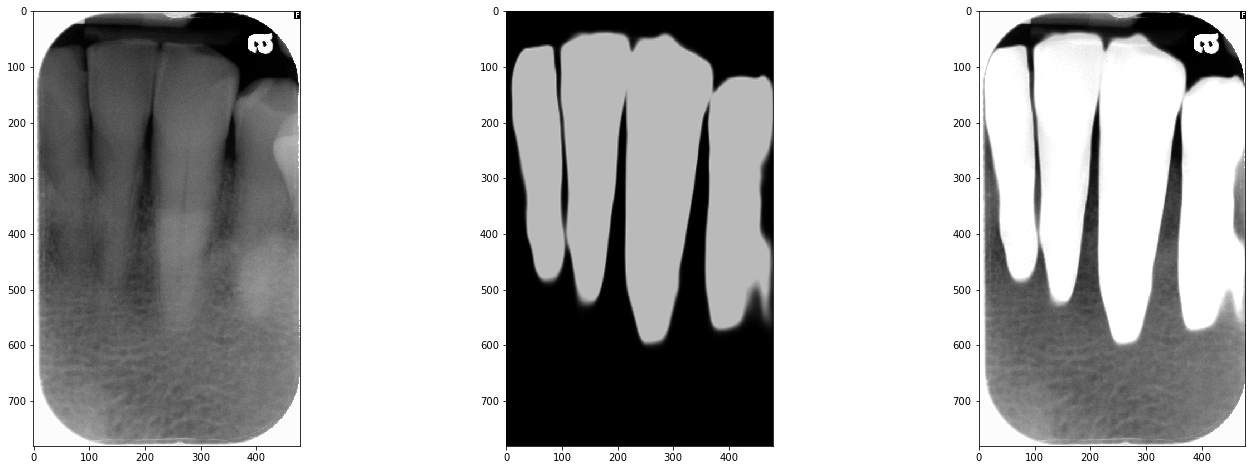

In [12]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1)
plt.imshow(original_image)
plt.subplot(1,3,2)
plt.imshow(predict_mask)
plt.subplot(1,3,3)
plt.imshow(add_image)

In [13]:
a = original_image
unique, counts = np.unique(a, return_counts=True)
#print(dict(zip(unique, counts)))

a = predict_mask
unique, counts = np.unique(a, return_counts=True)
print(dict(zip(unique, counts)))

a = add_image
unique, counts = np.unique(a, return_counts=True)
print(dict(zip(unique, counts)))


{0: 504072, 1: 9405, 2: 5880, 3: 3984, 4: 3240, 5: 2646, 6: 2091, 7: 1935, 8: 1815, 9: 1737, 10: 1425, 11: 1266, 12: 1224, 13: 1191, 14: 1131, 15: 1041, 16: 1083, 17: 915, 18: 897, 19: 861, 20: 861, 21: 912, 22: 855, 23: 786, 24: 789, 25: 738, 26: 669, 27: 717, 28: 783, 29: 822, 30: 720, 31: 687, 32: 708, 33: 639, 34: 579, 35: 669, 36: 612, 37: 627, 38: 624, 39: 561, 40: 504, 41: 540, 42: 594, 43: 519, 44: 495, 45: 489, 46: 555, 47: 528, 48: 504, 49: 462, 50: 540, 51: 477, 52: 507, 53: 498, 54: 462, 55: 447, 56: 420, 57: 414, 58: 513, 59: 429, 60: 468, 61: 471, 62: 396, 63: 345, 64: 450, 65: 435, 66: 420, 67: 408, 68: 465, 69: 366, 70: 438, 71: 357, 72: 396, 73: 471, 74: 456, 75: 396, 76: 447, 77: 387, 78: 384, 79: 372, 80: 420, 81: 327, 82: 339, 83: 360, 84: 372, 85: 363, 86: 360, 87: 366, 88: 396, 89: 318, 90: 351, 91: 399, 92: 363, 93: 369, 94: 348, 95: 405, 96: 375, 97: 381, 98: 363, 99: 351, 100: 309, 101: 408, 102: 366, 103: 315, 104: 321, 105: 375, 106: 390, 107: 327, 108: 282, 